# Session 4

## Index 
1. Intended learning outcomes
2. Roots of polynomials
3. Numerical equation solving
4. Optimisation
5. Integration and differentiaton
6. Optional: non-analytic integration and differentiation

## 1. Intended learning outcomes<a id="outcomes"></a>
After this session, you should be able to:
- use Python to find the roots of polynomials,
- solve equations numerically,
- be able to choose a sensible initial guess to achieve the desired computed solution to equations,
- find the location of the minimum of a function, including using a sensible initial guess,
- numerically integrate and differentiate functions.

<div style="background-color: #00FF00">
**Exercise 1 -  find the roots of $2x^5+3x^2=1$. Check that the roots are valid solutions (i.e. the value of the polynomial is zero at these points). Can you plot the poynomial and include an <span style="color:blue">if</span> statement that checks whether each solution is real, and if so overplot that solution on your graph? For this, the SciPy function <span style="color:blue">isreal()</span> is useful to determine if a number is real or complex.**

**Hint: the SciPy function <span style="color:blue">polyval()</span> calculates the y-values of a polynomial with given coefficients and x-values - this can be helpful to check if the solutions are valid**.



<div style="background-color: #FFA500">
Note that the results includes 2 complex numbers and 3 real numbers - check that students understand the complex variable notation when they print the result of the roots() function.

[ 0.54274225+1.07025342j  0.54274225-1.07025342j -1.        +0.        j
 -0.63354369+0.        j  0.54805918+0.        j]
[ 1.84297022e-14-1.12687637e-14j  1.84297022e-14+1.12687637e-14j
 -1.77635684e-15+0.00000000e+00j  1.11022302e-15+0.00000000e+00j
 -7.77156117e-16+0.00000000e+00j]


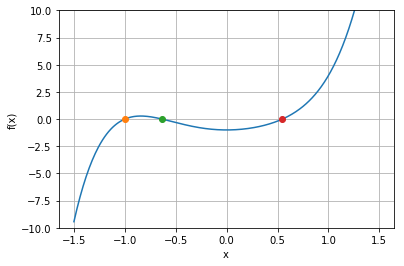

In [4]:
import scipy as sp
import matplotlib.pyplot as plt

coeffs=[2,0,0,3,0,-1]
result = sp.roots(coeffs)

print(result)
exact_values = sp.polyval(coeffs,result)

print(exact_values)

x = sp.arange(-1.5,1.5,0.01)
y = sp.poly1d(coeffs)
plt.grid()
plt.ylim([-10,10])
plt.plot(x,y(x))
plt.xlabel('x')
plt.ylabel('f(x)')

for i in result:
   if sp.isreal(i): plt.plot(i,sp.polyval(coeffs,i),'o')
plt.show()

<div style="background-color: #FFF8C6">
Below is a more complicated example for you to attempt.
<p>
**Exercise: use a random number generator to generate a 50th-order polynomial with integer coefficients between -5 and 5. Find the roots, print all valid solutions, and indicate them on a plot of the polynomial.**

[1.07692472+0.j 0.88707386+0.j 0.24734428+0.j]
[ 1.84297022e-14-1.12687637e-14j  1.84297022e-14+1.12687637e-14j
 -1.77635684e-15+0.00000000e+00j  1.11022302e-15+0.00000000e+00j
 -7.77156117e-16+0.00000000e+00j]


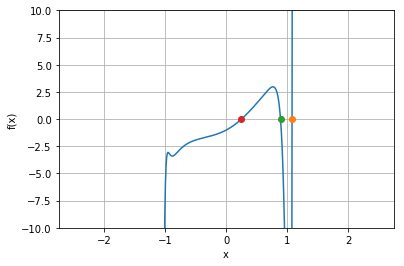

In [6]:
coeffs = sp.random.randint(-5,6,size=50)
result = sp.roots(coeffs)

print(result[sp.isreal(result)]) # Only print out real numbers

y_values = sp.polyval(coeffs,result[sp.isreal(result)])
print(exact_values)

x = sp.arange(-2.5,2.5,0.01)
y = sp.poly1d(coeffs)
plt.grid()
plt.ylim([-10,10])
plt.plot(x,y(x))
plt.xlabel('x')
plt.ylabel('f(x)')

for i in result:
   if sp.isreal(i): plt.plot(i,sp.polyval(coeffs,i),'o')
plt.show()


## 3. Numerical equation solving<a id="solving"></a>
<div style="background-color: #00FF00">
**Exercise 2 -  create a plot of $f_1(x) = x$ and $f_2(x) = \cos{x}$ in the same graph. Repeatedly zoom in on the intersection point of the two functions to find an approximate solution to $x=\cos{x}$ to 5 significant figures. You can do this by setting the axes limits using the matplotlib functions <span style="color:blue">xlim()</span> and <span style="color:blue">ylim()</span>. What limits the resolution of your solution?**

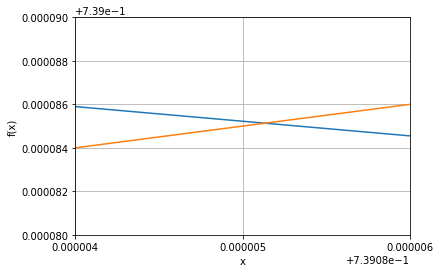

The intercept is at 0.73909 (5sf)


In [7]:
x = sp.linspace(0,2,10000)
y = sp.cos(x)

plt.grid()
plt.plot(x,y)
plt.plot(x,x)
plt.xlabel('x')
plt.ylabel('f(x)')

plt.xlim([0.739084,0.739086])# starting with a wide range and changing the limits gives this
plt.ylim([0.73908,0.73909])
plt.xticks(sp.arange(0.739084, 0.739086, 1e-6)) # For students to find out
plt.show()

print('The intercept is at 0.73909 (5sf)')

In [9]:
# Function that calculates the new estimate for x of intersection point
def update(x):
    return  x - ((sp.cos(x)-x)/(-sp.sin(x)-1))# Note that the derivative of cos(x) - x is -sin(x) - 1

x=0.5 # First guess of x-coordinate of intersection point
dx=x # dx is the change in x at each iteration. dx = x is the starting condition.

# Stop the while loop when dx is sufficiently small (i.e. accuracy of solution is sufficiently high)
while dx > 0.000000001 :
    xnew = update(x)# next estimate for x
    dx   = sp.absolute(x-xnew)# the change in x
    x    = xnew # update x to the new estimate for x
    
print(x)# the solution of the x of the intersection point
print(sp.cos(x)-x)# this should be zero if the solution is correct

0.7390851332151607
0.0


<div style="background-color: #00FF00">

**Exercise 3 -  Run the code above and pay attention to how quickly it converges. Now amend the code to show how many iterations the algorithm needs to find the solution. How robust is this algorithm (i.e. if you start it a long way from the solution does it still find the correct solution)?**

In [10]:
x=1000
dx=x 
no_iterations = 0

while dx > 0.000000001 :
    xnew = update(x)
    dx   = sp.absolute(x-xnew)
    x    = xnew
    no_iterations += 1

print(no_iterations)
print(x)
print(sp.cos(x)-x)

102
0.7390851332151607
0.0


<div style="background-color: #00FF00">
**Exercise 4: -  in the cell below is a simple example, which solves $-x^2+1 = 0$. Note that you are required to give an initial guess; run this code and see how the answer changes with the initial guess. What happens if you try an initial guess of 0 and why?**

[-1.]


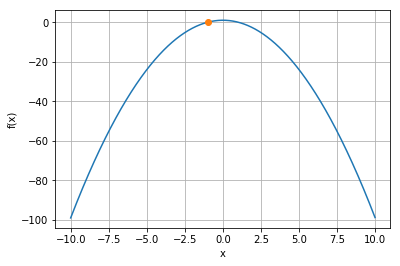

In [12]:
import scipy.optimize as op

#Our function to solve f(x) = 0
def func(x):
  return -x**2+1

initial_guess=-0.5

# solve the function
solution = op.fsolve(func,initial_guess)
print(solution)

#now plot the curves to be sure
x=sp.arange(-10,10,0.01)
y=func(x)

plt.plot(x,y)
plt.plot(solution,func(solution),'o')# Overplot the solution found
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

<div style="background-color: #FFF8C6">
### Solving functions of multiple variables
The function <span style="color:blue">fsolve()</span> can be used to solve sets of non-linear equations with multiple variables. So for example if you wished to solve the set of equations:</b>

$$x+y=y\cos{y} \\ x^2+y^2=3$$

you can do so with the script below:

In [13]:
# Define the function - note that there are now 2 variables, given in 1 array argument
def two_equations(variables):
    #print(variables)# If you print variables, you will see which values the algorithm tries for x and y
    x,y = variables[0],variables[1]
    output = [x+y-y*sp.cos(y),x*x+y*y-3]# The function returns an array: 1 element per equation
    return output

initial_guess=[1,2]

solution = op.fsolve(two_equations,initial_guess)
print("Solution:", solution)
print("Checking the solution:", two_equations(solution))


('Solution:', array([-1.07364009,  1.35915303]))
('Checking the solution:', [5.126177260450504e-12, 2.2531310150952777e-11])


<div style="background-color: #FFF8C6">
**Exercise: can you alter the example code above to find the other solution?**

In [14]:
# Define the function - note that there are now 2 variables, given in 1 array argument
def two_equations(variables):
    #print(variables)# If you print variables, you will see which values the algorithm tries for x and y
    x,y = variables[0],variables[1]
    output = [x+y-y*sp.cos(y),x*x+y*y-3]# The function returns an array: 1 element per equation
    return output

initial_guess=[1,-2]

solution = op.fsolve(two_equations,initial_guess)
print("Solution:", solution)
print("Checking the solution:", two_equations(solution))


('Solution:', array([ 1.07364009, -1.35915303]))
('Checking the solution:', [-5.551115123125783e-17, -4.440892098500626e-16])


<div style="background-color: #FFF8C6">
**Exercise: use <span style="color:blue">fsolve()</span> to solve the simultaneous equations:**

$$e^{-x}-y=0 \\ \sin{x}-y=0$$

**Is your solution unique? Plot both curves as well as your solution to check.**

('Solution:', array([0.58853274, 0.55514122]))
('Checking the solution:', [-3.774758283725532e-15, 6.328271240363392e-15])


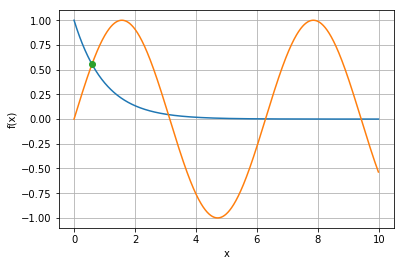

In [15]:
# Define the function - note that there are now 2 variables, given in 1 array argument
def my_two_equations(variables):
    #print(variables)# If you print variables, you will see which values the algorithm tries for x and y
    x,y = variables[0],variables[1]
    output = [sp.exp(-1*x)-y,sp.sin(x)-y]# The function returns an array: 1 element per equation
    return output

initial_guess=[1,0]

solution = op.fsolve(my_two_equations,initial_guess)
print("Solution:", solution)
print("Checking the solution:", my_two_equations(solution))

x  = sp.arange(0,10,0.01)
# Calculate the two functions
y1 = sp.exp(-1*x)
y2 = sp.sin(x)

# Plot the two functions
plt.plot(x,y1)
plt.plot(x,y2)
plt.xlabel('x')
plt.ylabel('f(x)')

# Plot the solution
plt.plot(solution[0],solution[1],'o')
plt.grid()
plt.show()

## 4. Optimisation<a id="optimisation"></a>


In [16]:
#define the function to be minimised

def func1(x):
     return x**2+x

#now minimise with a starting guess of 1
initial_guess = 1
x=op.fmin(func1, initial_guess)

print(x)

Optimization terminated successfully.
         Current function value: -0.250000
         Iterations: 18
         Function evaluations: 36
[-0.5]



<div style="background-color: #00FF00">
**Exercise 5: modify <span style="color:blue">func1</span> in the code above so that it also prints out the value x that it is called with and run the optimization again.** 

In [17]:
#define the function to be minimised

def func1(x):
     print(x)
     return x**2+x

#now minimise with a starting guess of 1
initial_guess = 1
x=op.fmin(func1,1)

print(x)

[1.]
[1.05]
[0.95]
[0.9]
[0.8]
[0.7]
[0.5]
[0.3]
[-0.1]
[-0.5]
[-1.3]
[-0.1]
[-0.9]
[-0.3]
[-0.7]
[-0.4]
[-0.6]
[-0.45]
[-0.55]
[-0.475]
[-0.525]
[-0.4875]
[-0.5125]
[-0.49375]
[-0.50625]
[-0.496875]
[-0.503125]
[-0.4984375]
[-0.5015625]
[-0.49921875]
[-0.50078125]
[-0.49960938]
[-0.50039063]
[-0.50019531]
[-0.49980469]
[-0.50009766]
Optimization terminated successfully.
         Current function value: -0.250000
         Iterations: 18
         Function evaluations: 36
[-0.5]


<div style="background-color: #00FF00">
**Exercise 6: now write a programme to minimise the function  $x^4−5x^3−20x^2+50x$ with an initial guess of -4. Try the same process with an initial guess of 3. Plot the function and mark on it the initial guess and the minimum found in each case. Explain what has happened. What conclusions can you draw about how to use <span style="color:blue">fmin()</span>? **

Optimization terminated successfully.
         Current function value: -132.992897
         Iterations: 16
         Function evaluations: 32
Optimization terminated successfully.
         Current function value: -252.683697
         Iterations: 18
         Function evaluations: 36
('with starting point ', -4, ' the found minimum is ', array([-2.44179687]))
('with starting point ', 3.0, ' the found minimum is ', array([5.20905762]))


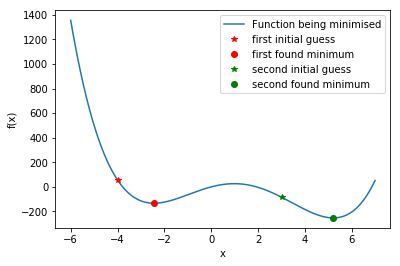

In [18]:
#define the function to be minimised

def my_function(x):
    return x**4-5*x**3-20*x**2+50*x

#try minimising with different starting values

x_i_1=-4
x1=op.fmin(my_function,x_i_1)

x_i_2=3.

x2=op.fmin(my_function,x_i_2)


print("with starting point ",x_i_1," the found minimum is ",x1)
print("with starting point ",x_i_2," the found minimum is ",x2)


# do some ploting to explain the situation

x=sp.arange(-6,7,0.01)
y=my_function(x)

plt.plot(x,y,label="Function being minimised")
plt.plot(x_i_1,my_function(x_i_1),'r*',label="first initial guess")
plt.plot(x1,my_function(x1),'ro',label="first found minimum")
plt.plot(x_i_2,my_function(x_i_2),'g*',label="second initial guess")
plt.plot(x2,my_function(x2),'go',label="second found minimum")

plt.xlabel("x")
plt.ylabel("f(x)")

plt.legend()
plt.show()

<div style="background-color: #FFF8C6">


**Exercise: find the *maximum* of the 2-D function: $f(x,y) = \sin(xy+y)\,e^{−(x^2+y^2)}$**

In [19]:
def func2(x):# this is the original function
    return sp.sin(x[0]*x[1]+x[1])*sp.exp(-(x[0]*x[0]+x[1]*x[1]))

# this function returns the negative of the original function: this is the one to minimize
# note that of course the function above could have just returned the negative of the function directly,
# it is split up here into two functions to make the change from maximising to minimising explicit.
def func2a(x):
    return -func2(x)

xi=[1,1]
xmax=op.fmin(func2a,xi)

print(xmax)
print(func2(xmax))


Optimization terminated successfully.
         Current function value: -0.448979
         Iterations: 41
         Function evaluations: 79
[0.29782394 0.62167754]
0.44897923628276154


<div style="background-color: #FFF8C6">

**Exercise: a cyclist is biking along a path when she witnesses a child falling into the river. At this moment, the cyclist is at point $A$ and the child at point $B$, as shown in the picture below. The cyclist's maximum speed is 30 km/h on the path, but only 15 km/h on the grass separating the path from the river. At which point should the cyclist cross the grass to reach the child in the shortest time? How long does it take the cyclist to get to the child?**

![cyclist](https://cclewley.github.io/ComputingYr1/Images4/cyclist.jpg)

In [20]:
length  = 200
width   = 50
v_path  = 30/3.6 # speed in m/s
v_grass = 15/3.6

def calc_time(L_path):
#L_path  = sp.arange(0,200,0.1)
    L_grass = sp.sqrt((length - L_path)**2 + 50**2)
    t_path  = L_path / v_path
    t_grass = L_grass / v_grass
    total_t = t_path + t_grass
    return total_t

xi = 100# initial guess
result = sp.optimize.fmin(calc_time,xi,full_output=True,disp=False)
print("The cyclist should cross the grass at %.1f m" %(result[0]) )
print("It will take %.1f s to get to the child." %(result[1]))


The cyclist should cross the grass at 171.1 m
It will take 34.4 s to get to the child.


## 5. Integration and Differentiation<a id="integration"></a>

In [21]:
import scipy.integrate as spi

results=spi.quad(sp.sin,0.,0.5*sp.pi)# Integrate sin(x) from 0 to 0.5 pi
print(results)

(0.9999999999999999, 1.1102230246251564e-14)


In [22]:
# Define the function to be integrated
def my_func(x,n,c):
   # print(x,n,c)
   return -n*x*x+c

result=spi.quad(my_func,0,1,args=(2,3))# Integrate the pre-defined function from 0 to 1 pi
print(result)

(2.3333333333333335, 2.590520390792032e-14)



<div style="background-color: #00FF00">

**Exercise 7: use <span style="color:blue">quad()</span> to integrate the following functions:**

** 1. $\frac{1}{x}$, with different sets of integration limits [1,10], [0,1] **

** 2. $\frac{1}{x^2}$, [1,$\infty$], (Hint: read the help for <span style="color:blue">quad()</span> to find out how to deal with the limit of $\infty$; remember that NumPy routines are also present in the Scipy package) **

** 3. $\frac{1}{x^2}$, [-1,1] **

** 4. $\tan(x)$, with different limits: [0,1], [1, $\pi \over 2$], [0,$\pi$] **

**Compare your results with what you would expect. Do you encounter any problems with any of these integrals? What are your conclusions about how and when to use <span style="color:blue">quad()</span>?**

In [23]:
# For f(x) = 1/x

#define function to calculate 1/x
def inv(x):
    return 1/x

#Integrate using quad for interval [1,10]
result = spi.quad(inv,1,10)
print("For 1 - 10:",result)

#define analytic solution to integral, calculate real answer
def inva(x1,x2):
    return (sp.log(x2)-sp.log(x1))

analytic = inva(1,10)
print(analytic)

result = spi.quad(inv,0,1)# For interval [0,1]
print(result)
print(inva(0,1))

('For 1 - 10:', (2.302585092994052, 1.748598974092929e-08))
2.302585092994046
(41.67684067538809, 9.35056037314051)
inf


C:\Users\Kristopher\Anaconda2\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Kristopher\Anaconda2\lib\site-packages\numpy\lib\scimath.py:262: RuntimeWarning: divide by zero encountered in log
  return nx.log(x)


In [24]:
# For f(x) = 1/x^2

#define function to calculate 1/x^2
def invsq(x):
    return 1./(x*x)

#Integrate using quad for interval [1,infinity]
result = spi.quad(invsq,1.,sp.inf)
print("For 1 - Inf:",result)

#define analytic solution to integral, calculate real answer
def inva(x1,x2):
    return (-1/x2 + 1/x1)

analytic = inva(1,sp.inf)
print(analytic)

# spi.quad(invsq,-1,1) # This will produce a division by zero error and traceback


('For 1 - Inf:', (1.0, 1.1102230246251565e-14))
1.0


(0.6156264703860144, 6.834826819912703e-15)
(38.58895946215512, 8.44349671255594)
(-1.7737549851747014e-14, 2.4281866219455655e-13)


C:\Users\Kristopher\Anaconda2\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Kristopher\Anaconda2\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


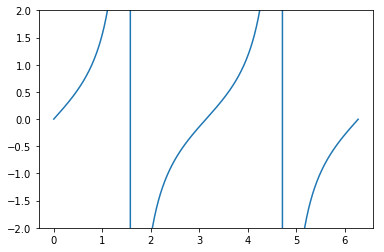

In [25]:
# To integrate tan(x) with various intervals:

print(spi.quad(sp.tan,0.,1.))
print(spi.quad(sp.tan,0.,sp.pi/2.))
print(spi.quad(sp.tan,0.,sp.pi))

x = sp.arange(0,2*sp.pi,0.01)
plt.plot(x,sp.tan(x))
plt.ylim([-2,2])
plt.show()

<div style="background-color: #FFF8C6">

To perform double integrals, we need to use the <span style="color:blue">dblquad()</span> function in the SciPy Integrate package.

**Exercise: use <span style="color:blue">dblquad()</span> to perform the following double integral: **

$$\int_0^1 \int_0^1 \cos(x^2+y^3)dxdy$$

**Hint: you may want to look up how to use lambda functions in Python.**

In [26]:
def dd(y,x):
    return sp.cos(x*x+y*y*y)

v = spi.dblquad(dd,0,1.,lambda y: 0, lambda y: 1)
print(v)

(0.7701944818578854, 1.0343984979535415e-14)


### Numerical differentation: the finite difference method

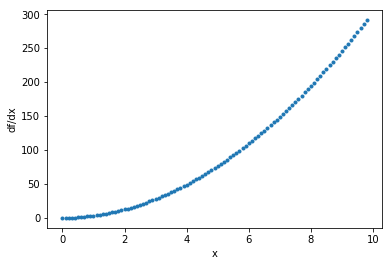

In [27]:
# Function for the forward finite difference method which returns the derivative of an array 
# Input paramaters: fx, the array of function vallues; h, the step size
def forward_finite(fx,h):
    Delta_fx = fx[1:]-fx[0:-1]
    return Delta_fx/h# Note that the returned array is 1 element shorter than the original array

h = 0.1 # Define the step size
x = sp.arange(0,10,h) # create an array of x-values between x = 0 and x = 10

# Calculate the function values (f(x) = x^3)
y = x**3

# Calculate the numerical derivative
dy = forward_finite(y,h)

# Plot the result (excluding the final element in x)
plt.plot(x[:-1],dy,'.')
plt.xlabel('x')
plt.ylabel('df/dx')
plt.show()

<div style="background-color: #00FF00">
**Exercise 8: run the code cell above and extend the code to calculate the analytic derivative of $f(x) = x^3$ and plot it in the same plot as the numerical derivative. Next, calculate the error in the numerical derivative (i.e. the difference between the analytic and numerical derivative) and plot it in a separate plot. What happens to the error when you change the value of the step size $h$?**

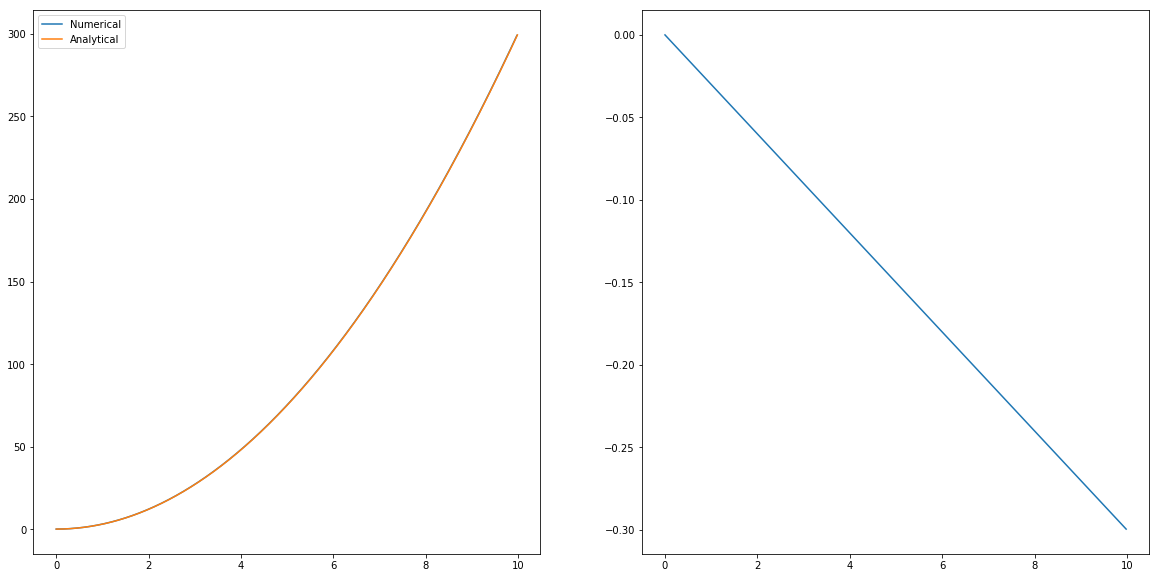

In [28]:
# Function for the forward finite difference method which returns the derivative of an array 
# Input paramaters: fx, the array of function vallues; h, the step size
def forward_finite(fx,h):
    Delta_fx = fx[1:]-fx[0:-1]
    return Delta_fx/h# Note that the returned array is 1 element shorter than the original array

h = 0.01 # Define the step size
x = sp.arange(0,10,h) # create an array of x-values between x = 0 and x = 10

# Calculate the function values (f(x) = x^3)
y = x**3

# Calculate the numerical derivative
dy = forward_finite(y,h)

# Calculate the analytical derivatives
dy_ana = 3*x*x

# Create the comparison plots and error plot
plt.rcParams.update({'figure.figsize': [20, 10]} )
plt.subplot(1,2,1)
plt.plot(x[0:-1],dy,label='Numerical')
plt.plot(x,dy_ana,label='Analytical')
plt.legend()
plt.subplot(1,2,2)
plt.ticklabel_format(useOffset=False)
plt.plot(x[0:-1],dy_ana[0:-1]-dy)
plt.show()


<div style="background-color: #FFF8C6">
Let's inspect how well our method works for a couple of other functions.
<p>
**Exercise: use the forward finite difference method to calculate the derivative of: **

** 1. $f(x) = \sin(x)$ **

** 2. $f(x) = 1/x$ **

**on the interval $[0,10]$ with $h=0.01$.**

**For both of these functions, create a plot of your numerical derivative and the analytic derivative, as well as a plot of the error in your numerical derivative. What happens to the error when you reduce $h$? **

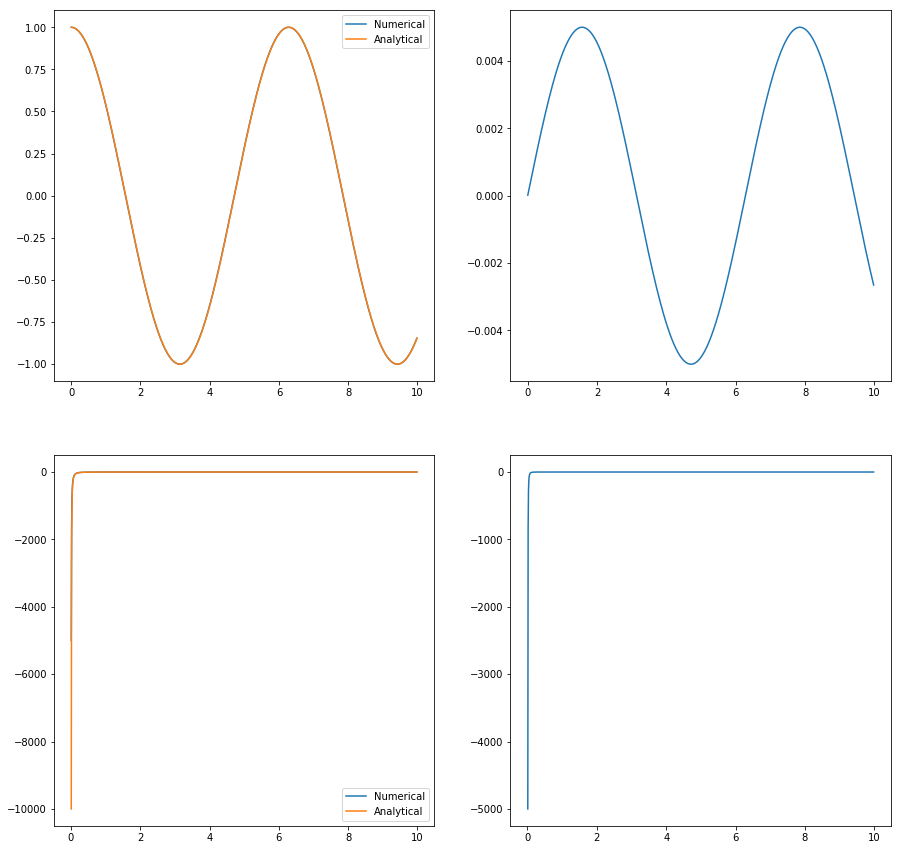

In [29]:
# Create the forward finite difference function
def forward_finite(fx,h):
    Delta_fx = fx[1:]-fx[0:-1]
    return Delta_fx/h# Note that the returned array is 1 element shorter than the original array

h = 0.01
x = sp.arange(0,10,h)

# Calculate the y-values for the two functions
y2 = sp.sin(x)
y3 = 1/x[1:]# Note that 1/x[0] is infinite, so we start at the next element

# Calculate the numerical derivatives
dy2 = forward_finite(y2,h)
dy3 = forward_finite(y3,h)

# Calculate the analytical derivatives
dy2_ana = sp.cos(x)
dy3_ana = -1/(x[1:]*x[1:])

# Create the two sets of comparison plots and error plots
plt.rcParams.update({'figure.figsize': [15, 15]} )
plt.subplot(2,2,1)
plt.plot(x[0:-1],dy2,label='Numerical')
plt.plot(x,dy2_ana,label='Analytical')
plt.legend()
plt.subplot(2,2,2)
plt.plot(x[0:-1],dy2_ana[0:-1]-dy2)
plt.subplot(2,2,3)
plt.plot(x[1:-1],dy3,label='Numerical')
plt.plot(x[1:],dy3_ana,label='Analytical')
plt.legend()
plt.subplot(2,2,4)
plt.plot(x[1:-1],dy3_ana[0:-1]-dy3)
plt.show()


<div style="background-color: #FFF8C6"> 
A somewhat more sophisticated version of the finite difference method is the *central* finite difference method. This is calculated using the function value on both sides of $x$:

$$ f^\prime(x) = \lim_{h\to 0}\frac{f(x+\frac{1}{2}h)-f(x-\frac{1}{2}h)}{h}$$

**Exercise: write a new function that calculates the numerical derivative according to the central finite difference method. Using this method, calculate the numerical derivative of the same three equations as above and compare its output with the forward finite difference method.**

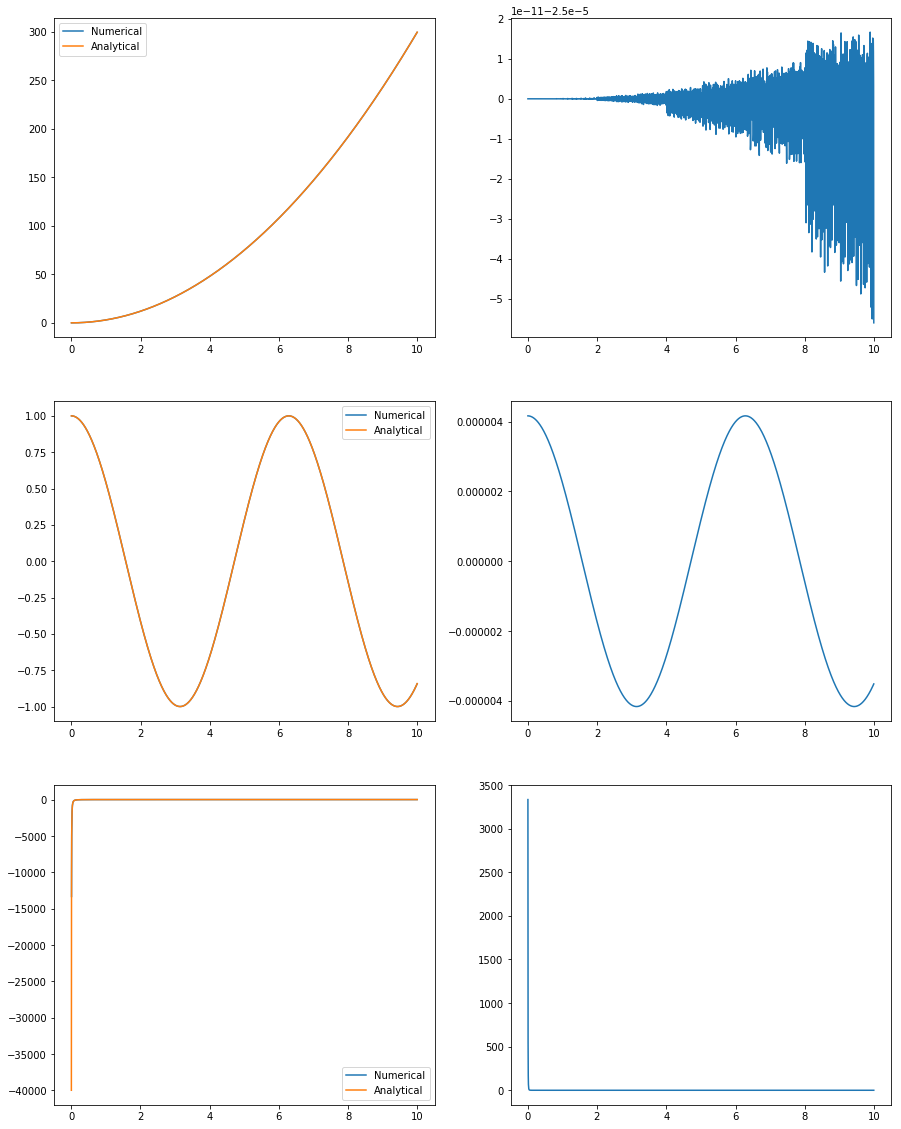

In [30]:
# Create the central finite difference function
def central_finite(fx,h):
    Delta_fx = fx[2:]-fx[0:-2]
    return Delta_fx/h# Note that the returned array is 2 elements shorter than the original array

h = 0.01
x = sp.arange(0,10,0.5*h)# Note that we now have to sample in steps of 0.5 h.

# Calculate the y-values for the three functions
y1 = x**3
y2 = sp.sin(x)
y3 = 1/x[1:]# Note that 1/x[0] is infinite, so we start at the next element

# Calculate the numerical derivatives
dy1 = central_finite(y1,h)
dy2 = central_finite(y2,h)
dy3 = central_finite(y3,h)

# Calculate the analytical derivatives
dy1_ana = 3*x*x
dy2_ana = sp.cos(x)
dy3_ana = -1/(x[1:]*x[1:])
# Create the three comparison plots and error plots
plt.rcParams.update({'figure.figsize': [15, 20]} )
plt.subplot(3,2,1)
plt.plot(x[1:-1],dy1,label='Numerical')# Note that x[1] is the first element to inspect
plt.plot(x,dy1_ana,label='Analytical')
plt.legend()
plt.subplot(3,2,2)
plt.plot(x[1:-1],dy1_ana[1:-1]-dy1)
plt.subplot(3,2,3)
plt.plot(x[1:-1],dy2,label='Numerical')
plt.plot(x,dy2_ana,label='Analytical')
plt.legend()
plt.subplot(3,2,4)
plt.plot(x[1:-1],dy2_ana[1:-1]-dy2)
plt.subplot(3,2,5)
plt.plot(x[2:-1],dy3,label='Numerical')
plt.plot(x[1:],dy3_ana,label='Analytical')
plt.legend()
plt.subplot(3,2,6)
plt.plot(x[2:-1],dy3_ana[1:-1]-dy3)
plt.show()

<div style="background-color: #FFF8C6">
## 6. Optional: non-analytic integration and differentiation<a id="non_analytic"></a>


<p>** Exercise: load in the velocity data from the file [car_velocity.txt](https://cclewley.github.io/ComputingYr1/Data4/car_velocity.txt) (which is in this session's 'Data' folder). Plot the data and reproduce the figure shown above. Calculate the interval at which the measurements were taken and hence integrate the data. **

** Note: The rectangle rule assumes constant spacing around a point, but we have a point that is defined at t=0 and t=end. How do you handle the boundaries? **


<div style="background-color: #FFF8C6">
#### Trapezoidal (or Trapezium) Rule 

** Exercise: using the data from [car_velocity.txt](https://cclewley.github.io/ComputingYr1/Data4/car_velocity.txt) (which is in this session's 'Data' folder), apply the trapezoidal rule to integrate the data and calculate the total distance travelled by the car. **


** Exercise: use the trapezoidal rule to calculate the distance travelled as a function of time. At what time has the car travelled half the total distance? **

('The rectangular rule gives: ', 897.5, 'm')
('The trapezoidal rule gives: ', 897.5, 'm')
('This is the value given by the scipy trapeziodal rule function:', 897.5, 'm')
('The car has travelled half the distance at: ', 21, 's')


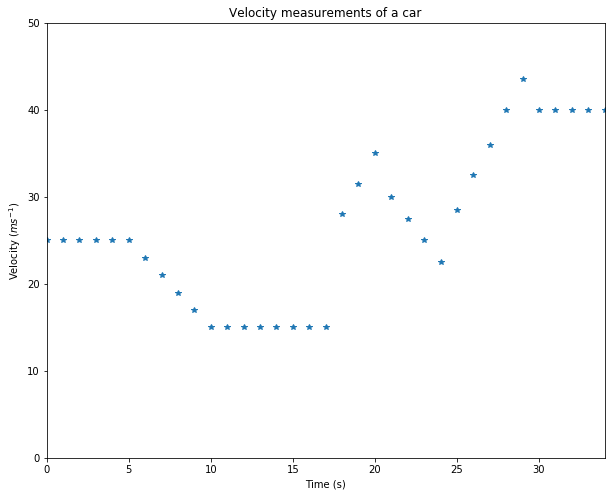

In [31]:
plt.rcParams.update({'figure.figsize': [10, 8]} )

import scipy as sp
import matplotlib.pyplot as plt

car_vel=sp.loadtxt('Data/car_velocity.txt')

### Reproduce figure

plt.plot(car_vel[:,0],car_vel[:,1],linestyle=' ',marker='*')
plt.xlim(0,34)
plt.ylim(0,50)
plt.xlabel('Time (s)')
plt.ylabel('Velocity ($ms^{-1}$)')
plt.title('Velocity measurements of a car')

step_size_vel=car_vel[1,0]-car_vel[0,0]
length_vel=sp.size(car_vel,0)-1


### RECTANGLE RULE

int_sum_rect=step_size_vel*sp.sum(car_vel[1:length_vel,1])

### First cell
int_sum_rect+=0.5*step_size_vel*car_vel[0,1]
### last cell
int_sum_rect+=0.5*step_size_vel*car_vel[length_vel,1]


### TRAPEZOIDAL RULE

int_sum_trap=0.0
for i in sp.arange(0,length_vel):
    int_sum_trap+=0.5*step_size_vel*(car_vel[i+1,1]+car_vel[i,1])
    

#### TRAPEZOIDAL AS A FUNCTION OF TIME
cumul_trap=0.0
for i in sp.arange(0,length_vel):
    cumul_trap+=0.5*step_size_vel*(car_vel[i+1,1]+car_vel[i,1])
    if(cumul_trap > 0.5*int_sum_trap):
        halfway_point=i
        break
    
int_sum_trap2=sp.trapz(car_vel[:,1],car_vel[:,0])
    
print("The rectangular rule gives: ", int_sum_rect, "m")
print("The trapezoidal rule gives: ", int_sum_trap, "m")
print("This is the value given by the scipy trapeziodal rule function:", int_sum_trap2, "m")
print("The car has travelled half the distance at: ", halfway_point, "s")

<div style="background-color: #FFF8C6">
### Differentiaton of non-analytic data



** Exercise: load in the dataset [car_distance.txt](https://cclewley.github.io/ComputingYr1/Data4/car_distance.txt) (which is in this session's 'Data' folder). Plot the data, remembering to label to axes, and then differentiate this data. Plot the resulting velocity, remembering to create a new time array that is defined on the half intervals. **


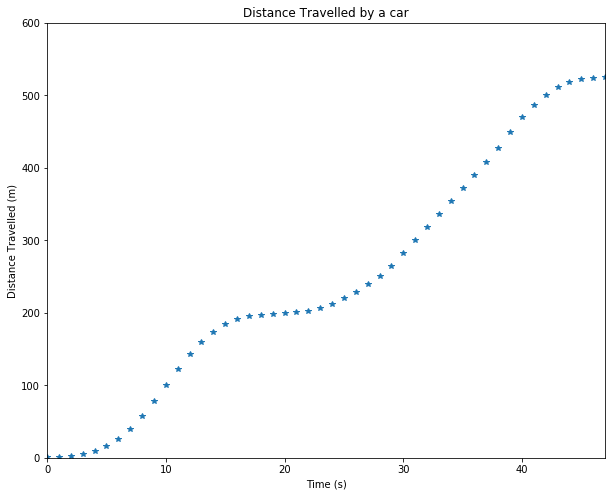

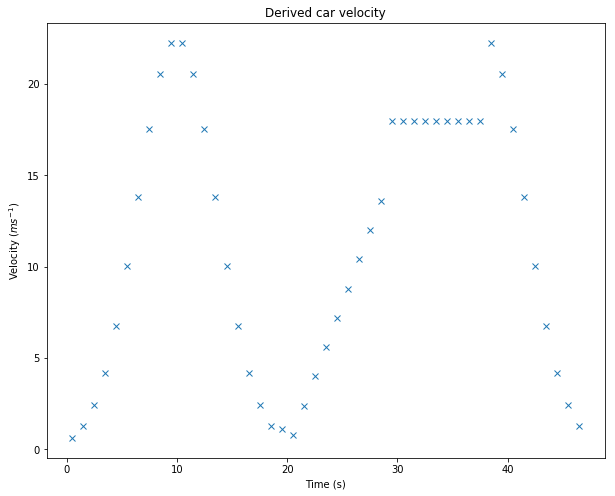

In [32]:
import scipy as sp

car_dist=sp.loadtxt('Data/car_distance.txt')

plt.plot(car_dist[:,0],car_dist[:,1],linestyle=' ',marker='*')
plt.xlabel('Time (s)')
plt.ylabel('Distance Travelled (m)')
plt.title('Distance Travelled by a car')
plt.xlim(0,47)
plt.ylim(0,600)

step_size=car_dist[1,0]-car_dist[0,0]
length_dist=sp.size(car_dist,0)-1

vel=sp.zeros(length_dist)
for i in sp.arange(0,length_dist):
    vel[i]=(car_dist[i+1,1]-car_dist[i,1])/(car_dist[i+1,0]-car_dist[i,0])
    
    
time=[i+0.5 for i in sp.arange(0,length_dist)]
vel2=sp.diff(car_dist[:,1])

plt.figure()
plt.plot(time,vel,'x')
plt.xlabel('Time (s)')
plt.ylabel('Velocity ($ms^{-1}$)')
plt.title('Derived car velocity')
plt.show()